In [60]:
%matplotlib inline
%load_ext Cython

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cython
from pathlib import Path
from os.path import join
from IPython.display import display_markdown
import glob
import re
sns.set()
sns.set_palette('colorblind')
import tqdm

import platform

if platform.system() == 'Darwin':
    %config InlineBackend.figure_format = 'retina'


The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


tqdm._tqdm.tqdm

In [27]:
def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(path + '.gz', *args, **kwargs)
    except: 
        return pd.read_csv(path, *args, **kwargs)

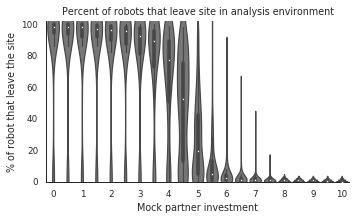

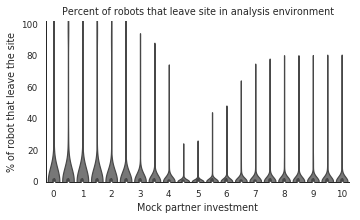

In [72]:
conds = ['fake_see', 'nofake_see']
megalog = {}
for cond in conds:
    run = 0
    path = f"/home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-2019-03-13-*/{cond}/**/rep00/"
    logs = []
    for curpath in tqdm.tqdm_notebook(sorted(glob.iglob(path, recursive=True))):
        try:
            gen = max([int(re.search('analysis_log_(\d+)', fname).group(1)) for fname in glob.glob(join(curpath, 'analysis_log_*'))])
            analyse_file = curpath + 'analysis_log_{}.txt'.format(gen)
        except IndexError:
            continue
        except ValueError:
            continue
        #print(analyse_file)
        log = read_csvx(analyse_file, delimiter="\t").query('oppCoop % 0.5 == 0')
        log['run'] = run
        log['onOpp'] = (log['oppId'] == 0)
        res = log.groupby(['oppNb', 'oppCoop'], as_index=False).mean()
        res['run'] = run
        logs.append(res)
        run += 1

    log = pd.concat(logs)

    plosrcparams = {'backend': 'pdf',
                    'axes.labelsize': 9,
                    'xtick.labelsize': 9,
                    'ytick.labelsize': 9,
                    'legend.fontsize': 9,
                    'lines.markersize': 3,
                    'font.size': 9,
                    'font.family': u'sans-serif',
                    'font.sans-serif': ['Arial'],
                    'text.usetex': False}

    import matplotlib as mpl

    mpl.rcParams.update(plosrcparams)
    sns.set_context('paper')
    sns.set_style('white')


    log = pd.concat(logs)
    log['teleport'] *= 100 
    megalog[cond] = log
    
    plt.figure(figsize=(5.1, 5.1/1.62))
    sns.violinplot(y='teleport', x='oppCoop', data=log.query('oppNb == 1 and oppCoop <= 10'), color="#777777", scale="count")
    plt.title('Percent of robots that leave site in analysis environment')
    plt.ylabel('% of robot that leave the site')
    plt.xlabel('Mock partner investment')
    plt.gca().set_xticklabels([str(int(x)) if x % 1 == 0 else '' for x in np.arange(0, 10.5, 0.5)])
    plt.ylim(-0, 102)
    sns.despine()
    plt.tight_layout()
    plt.savefig(f'Results/satisficing_{cond}.pdf')
    plt.show()

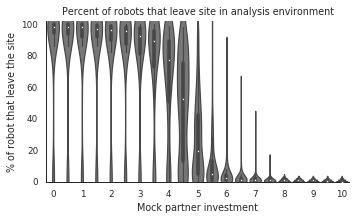

In [71]:
plt.figure(figsize=(5.1, 5.1/1.62))
sns.violinplot(y='teleport', x='oppCoop', data=log.query('oppNb == 1 and oppCoop <= 10'), color="#777777", scale="count")
plt.title('Percent of robots that leave site in analysis environment')
plt.ylabel('% of robot that leave the site')
plt.xlabel('Mock partner investment')
plt.gca().set_xticklabels([str(int(x)) if x % 1 == 0 else '' for x in np.arange(0, 10.5, 0.5)])
plt.ylim(-0, 102)
sns.despine()
plt.tight_layout()
plt.savefig(f'Results/satisficing_{cond}.pdf')
plt.show()

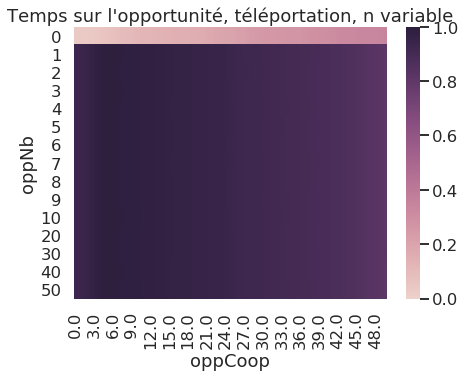

In [73]:
sns.set_context('talk')
heatmap = pd.pivot_table(data=log, values='onOpp', index=['oppNb'], columns=['oppCoop'], aggfunc=np.mean)
plt.figure(figsize=(7, 5))
plt.title('Temps sur l\'opportunité, téléportation, n variable')
sns.heatmap(heatmap, cmap=sns.cubehelix_palette(as_cmap=True), vmin=0, vmax=1)

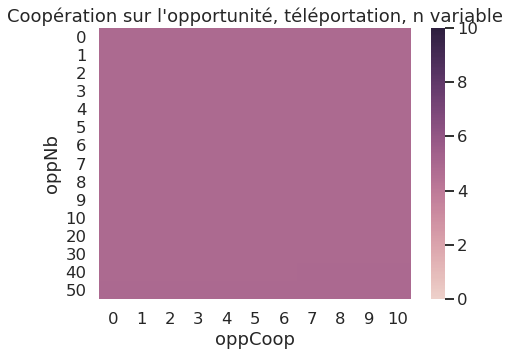

In [26]:
sns.set_context('talk')
heatmap = pd.pivot_table(data=log, values='ownCoop', index=['oppNb'], columns=['oppCoop'], aggfunc=np.mean)
plt.figure(figsize=(7, 5))
plt.title('Coopération sur l\'opportunité, téléportation, n variable')
sns.heatmap(heatmap, cmap=sns.cubehelix_palette(as_cmap=True), vmin=0, vmax=10)

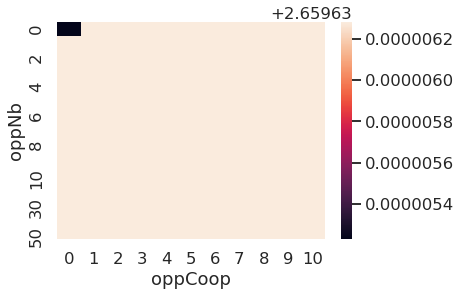

In [28]:
sns.heatmap(heatmap)

In [16]:
heatmap = pd.pivot_table(data=log, values='ownCoop', index=['oppNb'], columns=['oppCoop'], aggfunc=np.mean)


In [43]:
pd.pivot_table(data=log, values='ownCoop', index=['oppNb'], columns=['oppCoop'])

oppCoop,0,1,2,3,4,5,6,7,8,9,10
oppNb,,,,,,,,,,,
0,1.921523,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553
1,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553
2,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553
3,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553
4,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553
5,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553
6,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553
7,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553
8,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553,1.921553


log

In [24]:
run = 0
path = "/home/pecoffet/remotedata/bm-nvar-tp-2019-01-10-1712/**/run_09/rep00/"
logs = []
for curpath in sorted(glob.iglob(path, recursive=True)):
    analyse_file = sorted(glob.glob(curpath + 'analysis_log_*'), reverse=True)[0]
    print(analyse_file)
    log = read_csvx(analyse_file, delimiter="\t")
    log['run'] = run
    log['onOpp'] = (log['oppId'] == 0)
    res = log.groupby(['oppNb', 'oppCoop'], as_index=False).mean()
    res['run'] = run
    logs.append(res)
    run += 1
log2 = pd.concat(logs)

ValueError: No objects to concatenate

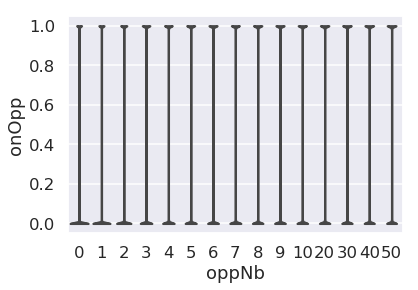

In [36]:
sns.violinplot(data=log.query('oppCoop == 3'), x='oppNb', y='onOpp', cut=0, bw=0.01, inner=None)

Text(0.5,1,'% de temps passé en moyenne par tous les individus avec une coopération = 3')

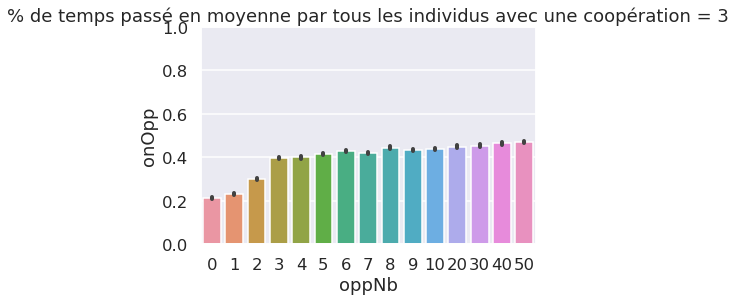

In [40]:
oppCoop = 3
sns.barplot(data=log.query(f'oppCoop == {oppCoop}'), x='oppNb', y='onOpp')
plt.ylim(0, 1)
plt.title(f'% de temps passé en moyenne par tous les individus avec une coopération = {oppCoop}')

Text(0.5,1,'% de temps passé en moyenne par tous les individus avec une coopération = 10')

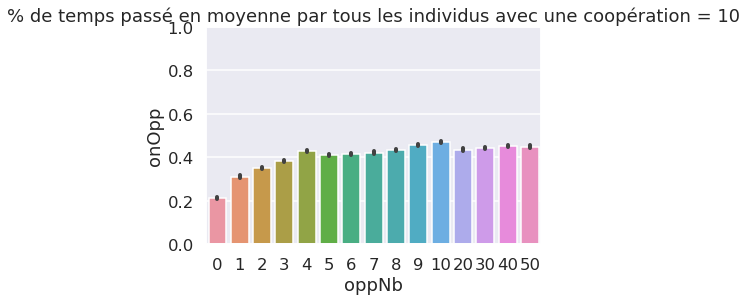

In [42]:
oppCoop = 10
sns.barplot(data=log.query(f'oppCoop == {oppCoop}'), x='oppNb', y='onOpp')
plt.ylim(0, 1)
plt.title(f'% de temps passé en moyenne par tous les individus avec une coopération = {oppCoop}')